In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
from os import listdir
from os.path import isfile, join
os.getcwd()
onlyfiles = [f for f in listdir("./ray_results")]
print(listdir("./ray_results"))


['run_2022-05-13_12-48-57', 'run_2022-05-13_17-24-04', 'run_2022-05-13_13-08-38', 'run_2022-05-13_17-28-00']


<AxesSubplot:xlabel='time_total_s'>

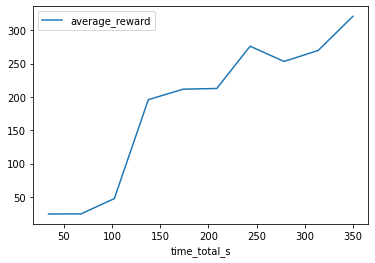

In [14]:
df = pd.read_csv("ray_results/run_2022-05-13_17-28-00/run_4626c_00000_0_batch_size=64,eta=0.12036,gamma=0.99,lr_model=0.001,max_replay_memory_size=10000,min_grad_steps_per_iter=10000,n_2022-05-13_17-28-01/progress.csv")
df.plot(x="time_total_s", y="average_reward")

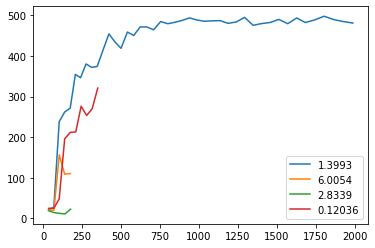

In [47]:
def plot(path, limsup = None):
    all_folders = [f for f in listdir(path) if os.path.isdir(os.path.join(path, f))]
    for f in all_folders:
        data = pd.read_csv(path+f+"/progress.csv")
        fig = plt.figure(0)
        if limsup != None:
            data = data[data["time_total_s"]<limsup]
        labels = f.split(",")
        eta = labels[1][4:]
        # "time_total_s" "average_reward" "q_error_train" "kl" "entorpy"
        plt.plot(data["time_total_s"], data["average_reward"], label=eta)
    plt.legend()
    plt.show()

path = "ray_results/run_2022-05-13_17-28-00/"
plot(path,2000)